# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from HouseholdSpecializationModel import HouseholdSpecializationModelClass

# Question 1

In [2]:
model = HouseholdSpecializationModelClass()
#Unpaking model parameters
par = model.par

list_alpha = [0.25, 0.5, 0.75]
list_sigma = [0.5, 1.0, 1.5]

#Code solves the discrete model for lists of alpha and sigma 
for i in list_sigma:
    par.sigma = i
    for j in list_alpha:
        par.alpha = j
        opt = model.solve_discrete()
        
        relative_hours = opt.HF/opt.HM
        print(f' For sigma = {par.sigma:.2f} and alpha = {par.alpha:.2f}, the relative hours in a discrete setting at home are: {relative_hours:.2f}')



 For sigma = 0.50 and alpha = 0.25, the relative hours in a discrete setting at home are: 0.55
 For sigma = 0.50 and alpha = 0.50, the relative hours in a discrete setting at home are: 1.00
 For sigma = 0.50 and alpha = 0.75, the relative hours in a discrete setting at home are: 1.83
 For sigma = 1.00 and alpha = 0.25, the relative hours in a discrete setting at home are: 0.31
 For sigma = 1.00 and alpha = 0.50, the relative hours in a discrete setting at home are: 1.00
 For sigma = 1.00 and alpha = 0.75, the relative hours in a discrete setting at home are: 3.25
 For sigma = 1.50 and alpha = 0.25, the relative hours in a discrete setting at home are: 0.21
 For sigma = 1.50 and alpha = 0.50, the relative hours in a discrete setting at home are: 1.00
 For sigma = 1.50 and alpha = 0.75, the relative hours in a discrete setting at home are: 4.67


# Question 2

**Ploting relative wage**

In [3]:
model_2 = HouseholdSpecializationModelClass()
#Unpaking model parameters
par = model_2.par

#list_wage = [0.8, 0.9, 1, 1.1, 1.2]
results_q2 = []

#Code solves the discrete model for different relativ wages
for i in par.wF_vec:
    par.wF = i
    opt = model_2.solve_discrete()
        
    relative_hours = opt.HF/opt.HM
    log_relative_h = np.log(relative_hours)
    results_q2 = np.append(results_q2, log_relative_h)
    print(f'For a relative wage ratio of {i:2f} the optimal relative hours at home are (HF/HM) {relative_hours:3f}')


For a relative wage ratio of 0.800000 the optimal relative hours at home are (HF/HM) 1.250000
For a relative wage ratio of 0.900000 the optimal relative hours at home are (HF/HM) 1.000000
For a relative wage ratio of 1.000000 the optimal relative hours at home are (HF/HM) 1.000000
For a relative wage ratio of 1.100000 the optimal relative hours at home are (HF/HM) 0.888889
For a relative wage ratio of 1.200000 the optimal relative hours at home are (HF/HM) 0.800000


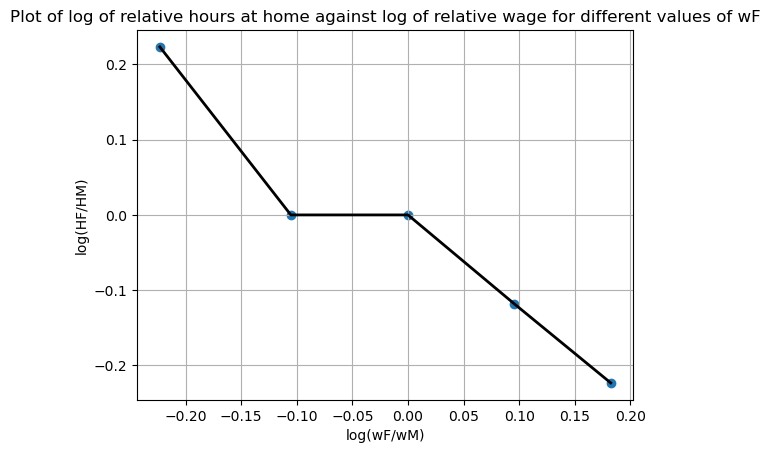

In [4]:
# create figure
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.log(par.wF_vec), results_q2, color='black', lw=2)
ax.scatter(np.log(par.wF_vec), results_q2)
# alterations to figure
ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Plot of log of relative hours at home against log of relative wage for different values of wF")
plt.show()

# Question 3

In [5]:
#Question 3 version A
model_3 = HouseholdSpecializationModelClass()
#Unpaking model parameters
par = model_3.par

results_q3 = []

#Code solves the continuous model for different relativ wages
for i in par.wF_vec:
    par.wF = i
    opt = model_3.solve()
        
    relative_hours = opt.HF/opt.HM
    log_relative_h = np.log(relative_hours)
    results_q3 = np.append(results_q3, log_relative_h)
    print(f'For a relative wage ratio of {i:2f} the optimal relative hours at home are (HF/HM) {relative_hours:3f}')

print(results_q3)
print(np.log(par.wF_vec))


For a relative wage ratio of 0.800000 the optimal relative hours at home are (HF/HM) 1.250012
For a relative wage ratio of 0.900000 the optimal relative hours at home are (HF/HM) 1.111120
For a relative wage ratio of 1.000000 the optimal relative hours at home are (HF/HM) 1.000006
For a relative wage ratio of 1.100000 the optimal relative hours at home are (HF/HM) 0.909092
For a relative wage ratio of 1.200000 the optimal relative hours at home are (HF/HM) 0.833345
[ 2.23153273e-01  1.05368268e-01  5.89691763e-06 -9.53086198e-02
 -1.82307387e-01]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


c:\Users\mathi\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:569: RuntimeWarning: Method nelder-mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


**Question 3 version 2**

 the optimal male hours at home and at the job are 4.092512 and 5.889268 while for the female 5.115690 and 2.869782
 the optimal male hours at home and at the job are 4.271042 and 5.167751 while for the female 4.745639 and 3.749284
 the optimal male hours at home and at the job are 4.454505 and 4.454509 while for the female 4.454531 and 4.454467
 the optimal male hours at home and at the job are 4.641940 and 3.759818 while for the female 4.219952 and 5.021963
 the optimal male hours at home and at the job are 4.832604 and 3.089729 while for the female 4.027227 and 5.479612
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]
[ 2.23153273e-01  1.05368268e-01  5.89691763e-06 -9.53086198e-02
 -1.82307387e-01]


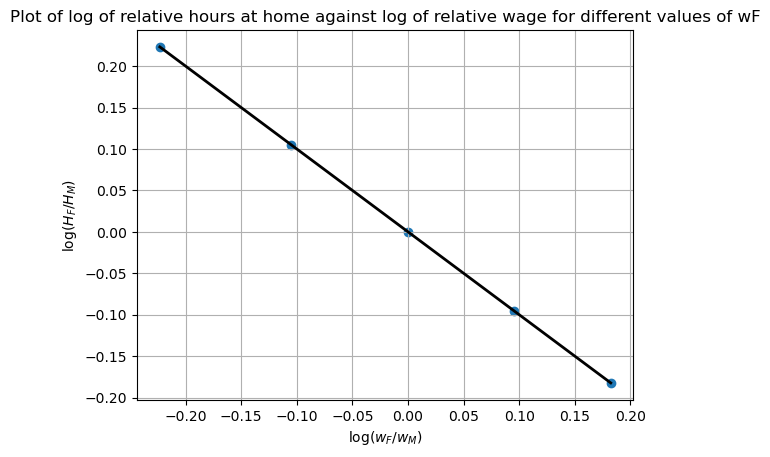

In [6]:
# create figure
model_q3 = HouseholdSpecializationModelClass()
par = model_q3.par

relative_hours = np.log(model_q3.solve_wF_vec() )

relative_wage = np.log(par.wF_vec / par.wM)
print(relative_wage)
print(relative_hours)

fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(relative_wage, relative_hours, color='black', lw=2)
ax.scatter(relative_wage, relative_hours)
# alterations to figure
ax.grid()
plt.xlabel('$\log(w_F / w_M)$')
plt.ylabel('$\log(H_F/H_M)$')
ax.set_title("Plot of log of relative hours at home against log of relative wage for different values of wF")
plt.show()






# Question 4 #

In [9]:
model_4 = HouseholdSpecializationModelClass()
par = model_4.par

def objective(x, model_4):
    par.alpha, par.sigma = x
    
    # Solve the model for the vector of female wages and run the regression
    model.solve_wF_vec()
    model.run_regression()
    
    beta0_diff = (model.par.beta0_target - model.sol.beta0)**2
    beta1_diff = (model.par.beta1_target - model.sol.beta1)**2
    
    return beta0_diff + beta1_diff

initial_parameter_guess = [0.5, 1.0]
bounds = [(0.01, 0.99), (0.01, 5.0)]


 the optimal male hours at home and at the job are 1.221439 and 8.071117 while for the female 7.978115 and 0.000000
 the optimal male hours at home and at the job are 1.271685 and 7.830027 while for the female 7.739336 and 0.452230
 the optimal male hours at home and at the job are 1.394883 and 7.247747 while for the female 7.247756 and 1.394899
 the optimal male hours at home and at the job are 1.520623 and 6.673478 while for the female 6.848913 and 2.164565
 the optimal male hours at home and at the job are 1.649096 and 6.114356 while for the female 6.518624 and 2.797575


LinAlgError: SVD did not converge in Linear Least Squares